## Simple neural network architecture comparison

In [6]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the simple neural network
class SimpleEnergyModel(nn.Module):
    def __init__(self):
        super(SimpleEnergyModel, self).__init__()
        self.fc1 = nn.Linear(4, 16)  # First hidden layer
        self.fc2 = nn.Linear(16, 8)  # Second hidden layer
        self.fc3 = nn.Linear(8, 1)   # Output layer
        self.relu = nn.ReLU()        # Activation function
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Custom dataset class
class EnergyDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features)
        # Convert pandas Series to numpy array first
        self.targets = torch.FloatTensor(targets.values.reshape(-1, 1))
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Load and preprocess data
data = pd.read_csv('energy_production_dataset.csv')
X = data[['time_of_day', 'temperature', 'cloud_cover', 'wind_speed']]
y = data['energy_production']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Train Linear Regression
print("\nTraining Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# 2. Train Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# 3. Train Simple Neural Network
print("\nTraining Simple Neural Network...")
# Create data loaders
train_dataset = EnergyDataset(X_train_scaled, y_train)
test_dataset = EnergyDataset(X_test_scaled, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize model and training parameters
model = SimpleEnergyModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_features, batch_targets in train_loader:
        # Forward pass
        outputs = model(batch_features)
        loss = criterion(outputs, batch_targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        avg_loss = total_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')

# Get Neural Network predictions
model.eval()
with torch.no_grad():
    nn_pred = model(torch.FloatTensor(X_test_scaled)).numpy()

# Calculate metrics for all models
models = {
    'Linear Regression': lr_pred,
    'Random Forest': rf_pred,
    'Simple Neural Network': nn_pred.reshape(-1)
}

# Print comparison metrics
print("\nModel Comparison:")
print("-" * 50)
for model_name, predictions in models.items():
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    print(f"\n{model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")


Training Linear Regression...

Training Random Forest...

Training Simple Neural Network...
Epoch [10/100], Average Loss: 499.4665
Epoch [20/100], Average Loss: 99.4951
Epoch [30/100], Average Loss: 65.8187
Epoch [40/100], Average Loss: 54.5313
Epoch [50/100], Average Loss: 47.1459
Epoch [60/100], Average Loss: 40.8520
Epoch [70/100], Average Loss: 35.3215
Epoch [80/100], Average Loss: 30.5545
Epoch [90/100], Average Loss: 27.0076
Epoch [100/100], Average Loss: 24.4163

Model Comparison:
--------------------------------------------------

Linear Regression:
MAE: 8.0407
RMSE: 9.8261
R2 Score: 0.7833

Random Forest:
MAE: 3.0264
RMSE: 4.3718
R2 Score: 0.9571

Simple Neural Network:
MAE: 4.2503
RMSE: 5.5510
R2 Score: 0.9308


## Advanced neural network architecture comparison

In [7]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt



data = pd.read_csv('energy_production_dataset.csv')
# Split features and target
X = data[['time_of_day', 'temperature', 'cloud_cover', 'wind_speed']]
y = data['energy_production']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Train Linear Regression
print("\nTraining Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

# 2. Train Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# 3. Neural Network
class SolarDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features)
        self.targets = torch.FloatTensor(targets.values).reshape(-1, 1)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

train_dataset = SolarDataset(X_train_scaled, y_train)
test_dataset = SolarDataset(X_test_scaled, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class SolarNet(nn.Module):
    def __init__(self):
        super(SolarNet, self).__init__()
        self.batch_norm1 = nn.BatchNorm1d(4)
        
        # First parallel branch - deeper network
        self.deep_branch = nn.Sequential(
            nn.Linear(4, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU()
        )
        
        # Second parallel branch - wider network
        self.wide_branch = nn.Sequential(
            nn.Linear(4, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(256, 32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU()
        )
        
        # Combine branches
        self.combine = nn.Sequential(
            nn.Linear(64, 32),  # 32 + 32 = 64 from both branches
            nn.BatchNorm1d(32),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(),
            
            nn.Linear(16, 1)
        )
        
    def forward(self, x):
        x = self.batch_norm1(x)
        
        # Process both branches
        deep_features = self.deep_branch(x)
        wide_features = self.wide_branch(x)
        
        # Concatenate features from both branches
        combined = torch.cat((deep_features, wide_features), dim=1)
        
        # Final processing
        return self.combine(combined)

print("\nTraining Neural Network...")
model = SolarNet()
criterion = nn.HuberLoss(delta=1.0)  # More robust to outliers than MSE
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                      factor=0.5, patience=5, 
                                                      verbose=True)

n_epochs = 200  # Increased epochs
train_losses = []
val_losses = []

for epoch in range(n_epochs):
    model.train()
    epoch_loss = 0
    for batch_features, batch_targets in train_loader:
        outputs = model(batch_features)
        loss = criterion(outputs, batch_targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_features, batch_targets in test_loader:
            outputs = model(batch_features)
            val_loss += criterion(outputs, batch_targets).item()
    
    train_losses.append(epoch_loss / len(train_loader))
    val_losses.append(val_loss / len(test_loader))
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

# Get Neural Network predictions
model.eval()
with torch.no_grad():
    nn_pred = model(torch.FloatTensor(X_test_scaled)).numpy()
nn_mae = mean_absolute_error(y_test, nn_pred)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))
nn_r2 = r2_score(y_test, nn_pred)

# Print comparison metrics
print("\nModel Comparison:")
print("-" * 50)
models = {
    'Linear Regression': (lr_pred, lr_mae, lr_rmse, lr_r2),
    'Random Forest': (rf_pred, rf_mae, rf_rmse, rf_r2),
    'Neural Network': (nn_pred, nn_mae, nn_rmse, nn_r2)
}

for model_name, (pred, mae, rmse, r2) in models.items():
    print(f"\n{model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")




Training Linear Regression...

Training Random Forest...

Training Neural Network...


/Users/adityaganguli/.pyenv/versions/3.8.16/envs/tech-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [20/200], Train Loss: 10.1215, Val Loss: 9.4772
Epoch [40/200], Train Loss: 4.5345, Val Loss: 2.6416
Epoch [60/200], Train Loss: 3.8064, Val Loss: 2.6032
Epoch [80/200], Train Loss: 4.0547, Val Loss: 2.3155
Epoch [100/200], Train Loss: 3.5829, Val Loss: 2.4265
Epoch [120/200], Train Loss: 3.4765, Val Loss: 2.2050
Epoch [140/200], Train Loss: 3.7315, Val Loss: 2.0567
Epoch [160/200], Train Loss: 3.6614, Val Loss: 2.6129
Epoch [180/200], Train Loss: 4.3844, Val Loss: 2.7144
Epoch [200/200], Train Loss: 3.8974, Val Loss: 2.1167

Model Comparison:
--------------------------------------------------

Linear Regression:
MAE: 8.0407
RMSE: 9.8261
R2 Score: 0.7833

Random Forest:
MAE: 3.0264
RMSE: 4.3718
R2 Score: 0.9571

Neural Network:
MAE: 2.3811
RMSE: 3.3599
R2 Score: 0.9747


### Improvements in advanced architecture

#### Network Structure


Simple Network: Just a straight line of layers (4 → 16 → 8 → 1)
Advanced Network: Uses two parallel paths (branches) to process data:

Deep Branch: Goes deeper with more layers (4 → 128 → 64 → 32)
Wide Branch: Goes wider with bigger layers (4 → 256 → 32)
Think of it like having two different experts looking at the same problem in different ways, then combining their opinions.

#### Batch Normalization (BatchNorm1d):

Like standardizing your data as you go
Helps the network learn more stably
Added after each layer


#### Dropout (0.3 and 0.2):

Randomly turns off some connections during training
Like forcing the network to not rely too much on any single path
Helps prevent overfitting (when the model memorizes instead of learning)


#### LeakyReLU instead of ReLU:

Both are activation functions (they decide when neurons should fire)
LeakyReLU allows a small signal to pass even when inactive
This can help prevent "dead neurons" (neurons that stop learning)

### Better training setup

#### HuberLoss instead of MSELoss:

More robust to outliers in your data
Like being more forgiving of occasional weird measurements


#### AdamW instead of Adam:

An improved version of the Adam optimizer
Adds weight decay (0.01) which helps prevent overfitting
Like adding a penalty for making things too complicated


#### Learning Rate Scheduler:

Automatically adjusts how big steps the model takes while learning
If improvement slows down, it takes smaller steps
Like being more careful when you're getting close to the best answer

## Advanced neural network architecture on non linear dataset

/Users/adityaganguli/.pyenv/versions/3.8.16/envs/tech-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [20/300], Train Loss: 31.0893, Val Loss: 41.2299
Epoch [40/300], Train Loss: 26.1916, Val Loss: 37.0414
Epoch [60/300], Train Loss: 19.5023, Val Loss: 28.5361
Epoch [80/300], Train Loss: 14.6297, Val Loss: 22.5372
Epoch [100/300], Train Loss: 12.0045, Val Loss: 18.4256
Epoch [120/300], Train Loss: 9.8207, Val Loss: 15.0835
Epoch [140/300], Train Loss: 8.0938, Val Loss: 12.4628
Epoch [160/300], Train Loss: 7.1959, Val Loss: 9.9156
Epoch [180/300], Train Loss: 6.0983, Val Loss: 8.0013
Epoch [200/300], Train Loss: 5.4292, Val Loss: 6.6238
Epoch [220/300], Train Loss: 4.6675, Val Loss: 5.8694
Epoch [240/300], Train Loss: 4.0161, Val Loss: 5.3380
Early stopping at epoch 245

Neural Network Performance:
MAE: 4.5764
RMSE: 9.5388
R² Score: 0.9463


/var/folders/8p/1gfm1_3j1fgg5cch6pfct1780000gn/T/ipykernel_66885/181842254.py:168: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model

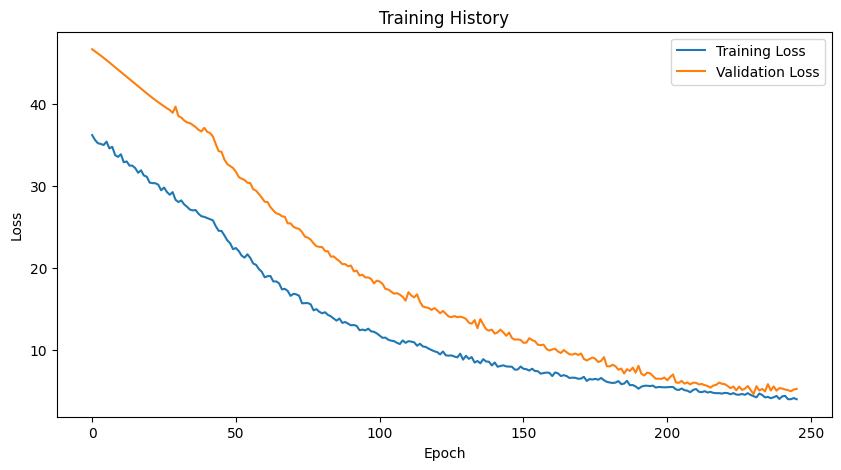


Training Linear Regression...

Training Random Forest...


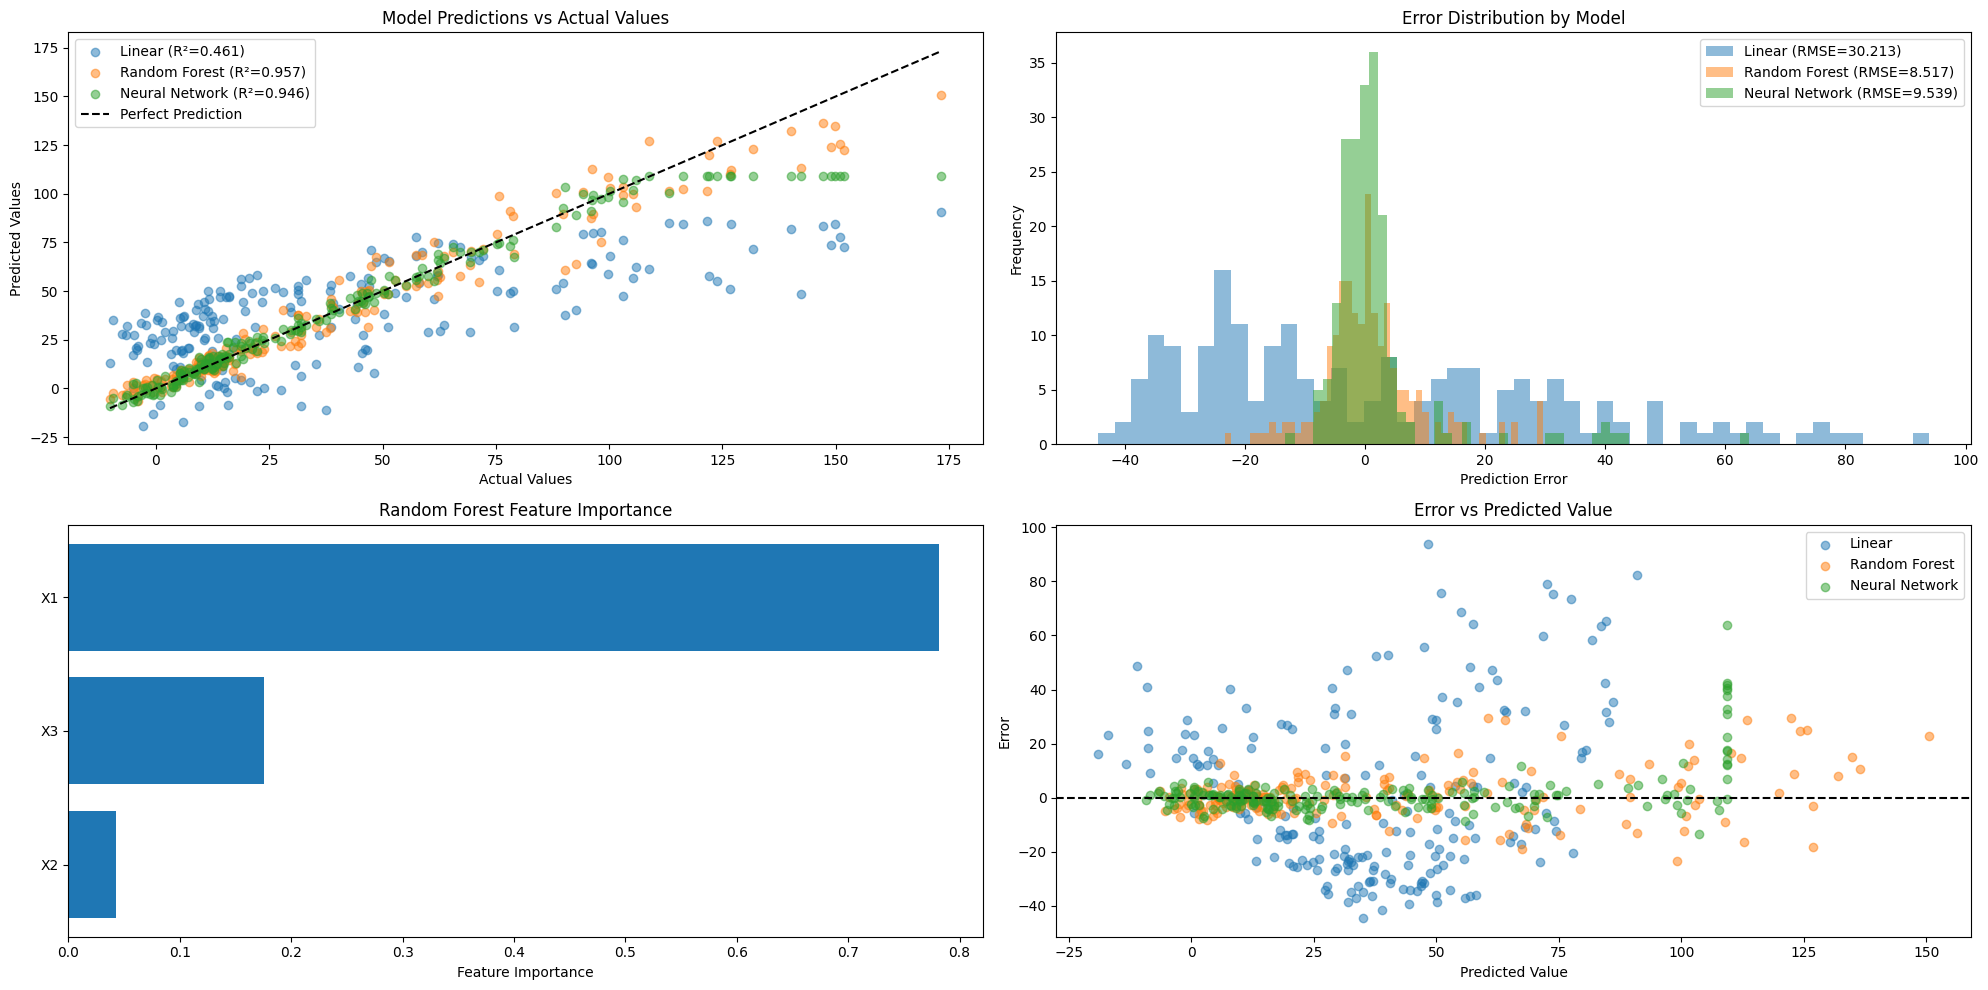


Model Comparison:
--------------------------------------------------

Linear Regression:
MAE: 25.0761
RMSE: 30.2131
R² Score: 0.4614

Random Forest:
MAE: 5.8601
RMSE: 8.5170
R² Score: 0.9572

Neural Network:
MAE: 4.5764
RMSE: 9.5388
R² Score: 0.9463

Detailed Error Analysis:
--------------------------------------------------

Linear Regression:
Mean Error: 1.1665
Error Std: 30.1906
Max Error: 93.9737
Error 95th Percentile: 60.0406

Random Forest:
Mean Error: 0.9263
Error Std: 8.4664
Max Error: 29.6722
Error 95th Percentile: 18.9598

Neural Network:
Mean Error: 1.7440
Error Std: 9.3780
Max Error: 63.9877
Error 95th Percentile: 17.3701


In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

class ResidualBlock(nn.Module):
    def __init__(self, in_features, hidden_features):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Linear(in_features, hidden_features),
            nn.LayerNorm(hidden_features),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_features, in_features),
            nn.LayerNorm(in_features),
            nn.Dropout(0.1)
        )
        
    def forward(self, x):
        return x + self.block(x)

class ImprovedNonLinearNet(nn.Module):
    def __init__(self, input_size):
        super(ImprovedNonLinearNet, self).__init__()
        
        # Initial feature expansion
        self.input_block = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.LayerNorm(256),
            nn.GELU(),
            nn.Dropout(0.1)
        )
        
        # Deep residual blocks
        self.res_blocks = nn.ModuleList([
            ResidualBlock(256, 512) for _ in range(6)
        ])
        
        # Parallel processing paths
        self.path1 = nn.Sequential(
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.GELU()
        )
        
        self.path2 = nn.Sequential(
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.GELU()
        )
        
        # Final layers with skip connection
        self.final = nn.Sequential(
            nn.Linear(256, 64),
            nn.LayerNorm(64),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(64, 32),
            nn.LayerNorm(32),
            nn.GELU(),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        # Initial feature processing
        x = self.input_block(x)
        
        # Residual blocks
        for res_block in self.res_blocks:
            x = res_block(x)
        
        # Parallel paths
        path1_out = self.path1(x)
        path2_out = self.path2(x)
        
        # Combine paths
        combined = torch.cat([path1_out, path2_out], dim=1)
        
        # Final processing
        return self.final(combined)

# Load and prepare data
data = pd.read_csv('nonlinear_dataset.csv')
X = data[['X1', 'X2', 'X3']]
y = data['target']

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

# Create data loaders with larger batch size
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize model and training components
model = ImprovedNonLinearNet(input_size=3)
criterion = nn.HuberLoss(delta=1.0)  # Robust loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                          factor=0.5, patience=10, 
                                                          verbose=True, min_lr=1e-6)

# Training loop with validation
best_val_loss = float('inf')
patience = 15
patience_counter = 0
train_losses = []
val_losses = []

for epoch in range(300):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        # Scheduler step moved outside batch loop
        epoch_loss += loss.item()
    
    # Validation phase
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            val_loss += criterion(outputs, batch_y).item()
    
    train_losses.append(epoch_loss / len(train_loader))
    val_losses.append(val_loss / len(test_loader))
    
    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        # Save best model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch}')
            break
    
    # Update scheduler with validation loss
    scheduler.step(val_losses[-1])
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/300], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

# Load best model
model.load_state_dict(torch.load('best_model.pth'))

# Get predictions
model.eval()
with torch.no_grad():
    nn_pred = model(X_test_tensor).numpy()

# Calculate metrics
nn_mae = mean_absolute_error(y_test, nn_pred)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))
nn_r2 = r2_score(y_test, nn_pred.ravel())

print("\nNeural Network Performance:")
print(f"MAE: {nn_mae:.4f}")
print(f"RMSE: {nn_rmse:.4f}")
print(f"R² Score: {nn_r2:.4f}")

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

# Train Linear Regression
print("\nTraining Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

# Train Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# Create comparison visualizations
plt.figure(figsize=(20, 10))

# 1. Model Predictions vs Actual
plt.subplot(2, 2, 1)
plt.scatter(y_test, lr_pred, alpha=0.5, label=f'Linear (R²={lr_r2:.3f})')
plt.scatter(y_test, rf_pred, alpha=0.5, label=f'Random Forest (R²={rf_r2:.3f})')
plt.scatter(y_test, nn_pred, alpha=0.5, label=f'Neural Network (R²={nn_r2:.3f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs Actual Values')
plt.legend()

# 2. Error Distribution
plt.subplot(2, 2, 2)
plt.hist(y_test - lr_pred, bins=50, alpha=0.5, label=f'Linear (RMSE={lr_rmse:.3f})')
plt.hist(y_test - rf_pred, bins=50, alpha=0.5, label=f'Random Forest (RMSE={rf_rmse:.3f})')
plt.hist(y_test - nn_pred.ravel(), bins=50, alpha=0.5, label=f'Neural Network (RMSE={nn_rmse:.3f})')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Error Distribution by Model')
plt.legend()

# 3. Feature Importance (Random Forest)
plt.subplot(2, 2, 3)
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)
plt.barh(importance['feature'], importance['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

# 4. Error vs Predicted Value
plt.subplot(2, 2, 4)
plt.scatter(lr_pred, y_test - lr_pred, alpha=0.5, label='Linear')
plt.scatter(rf_pred, y_test - rf_pred, alpha=0.5, label='Random Forest')
plt.scatter(nn_pred.ravel(), y_test - nn_pred.ravel(), alpha=0.5, label='Neural Network')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Error')
plt.title('Error vs Predicted Value')
plt.legend()

plt.tight_layout()
plt.show()

# Print comprehensive metrics comparison
print("\nModel Comparison:")
print("-" * 50)
models = {
    'Linear Regression': (lr_mae, lr_rmse, lr_r2),
    'Random Forest': (rf_mae, rf_rmse, rf_r2),
    'Neural Network': (nn_mae, nn_rmse, nn_r2)
}

for name, (mae, rmse, r2) in models.items():
    print(f"\n{name}:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Additional error analysis
print("\nDetailed Error Analysis:")
print("-" * 50)
for name, pred in [('Linear Regression', lr_pred), 
                  ('Random Forest', rf_pred), 
                  ('Neural Network', nn_pred.ravel())]:
    errors = y_test - pred
    print(f"\n{name}:")
    print(f"Mean Error: {np.mean(errors):.4f}")
    print(f"Error Std: {np.std(errors):.4f}")
    print(f"Max Error: {np.max(np.abs(errors)):.4f}")
    print(f"Error 95th Percentile: {np.percentile(np.abs(errors), 95):.4f}")